# Neural Networks

### Importing Packages

In [569]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

## Data Preparation

### Load Dataset

In [570]:
mnist = tf.keras.datasets.mnist

In [571]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

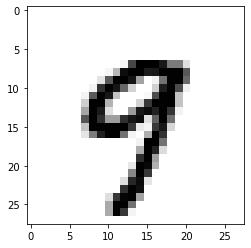

In [572]:
plt.imshow(X_train[45], plt.cm.binary)

###  Normalise the Feature Values

This just squashes all the values to be between 0 and 1. This helps our algorithm.

In [573]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

### Build the Model

#### Define Model Type

We are going to build our model up as a linear stack of layers. To do this, we create an instance of a `Sequential` object

In [574]:
model = Sequential()

#### Add the Layers

##### Input Layer

In [575]:
model.add(tf.keras.layers.Flatten()) # Since the input layers is square

##### Hidden Layer

In [576]:
model.add(Dense(128, activation=tf.nn.relu)) # Full connected layer, ReLU activation
model.add(Dense(128, activation=tf.nn.relu)) # Another hidden layer, same setup

##### Output Layer

In [577]:
model.add(Dense(10, activation=tf.nn.softmax)) # Ten output neurons correspond to the numbers it can guess

### Compile Model

In [578]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Adam most popular optimizer

### Fit Model

In [579]:
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4635 - accuracy: 0.8705
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1144 - accuracy: 0.9648
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0751 - accuracy: 0.9763


### Making Predictions

In [583]:
predictions = model.predict(X_test)

In [584]:
predictions[0]

array([6.3032519e-07, 9.1722228e-08, 1.7711329e-05, 4.5085888e-04,
       4.5059875e-10, 8.6533771e-07, 7.4408904e-13, 9.9952614e-01,
       5.4351005e-07, 3.1944865e-06], dtype=float32)

In [586]:
np.argmax(predictions[0])

7

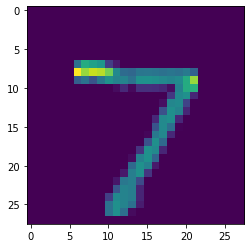

In [587]:
plt.imshow(X_test[0])

### Evaluating Model

In [588]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 924us/step - loss: 0.0912 - accuracy: 0.9689
0.0912187248468399 0.9689496755599976


### Saving Model

In [ ]:
model.save('mnist.model')

#### Loading Model

In [427]:
new_model = tf.keras.models.load_model('mnist.model')